# Building Machine Learning Model to Predict Employee Turn-Over

## Problem Definition

### Project Overview

Employee turn-over refers to the number or percentage of workers who leave an organization and are replaced by new employees. Employee turn-over is a costly problem for companies. The true cost of replacing an employee
can often be quite large. A study by the [Center for American Progress](https://www.americanprogress.org/wp-content/uploads/2012/11/CostofTurnover.pdf) found that companies typically pay about one-fifth of an employee’s salary to replace that employee, and the cost can significantly increase if executives or highest-paid employees are to be replaced. <br>

In other words, the cost of replacing employees for most employers remains significant. This is due to the amount of time spent to interview and find a replacement, sign-on bonuses, and the loss of productivity for several months while the new employee gets accustomed to the new role. <br>

### Problem Statement

This project attempt to solve the following problem statement: <br>
> What is the likelihood of an active employee leaving the company? <br>
What are the key indicators of an employee leaving the company? <br>

## Dataset Analysis

In this project, a HR dataset was sourced from [IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) which contains employee data for 1,470 employees with various information about the employees. This dataset will be used to predict whether employees are going to quit by understanding the main drivers of employee turn-over. <br>

### Importing Python libraries

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the data

> The dataset contains 1,470 rows and 35 columns.

In [123]:
# Read CSV file
df_sourcefile = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
print("Shape of dataframe is: {}".format(df_sourcefile.shape))

Shape of dataframe is: (1470, 35)


In [124]:
# Make a copy of the original sourcefile
df_HR = df_sourcefile.copy()

### Data Description and Exploratory Visualisations

#### Overview

In [125]:
# Dataset columns
df_HR.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

> The dataset contains several numerical and categorical columns providing various information on employee's personal and employment details.

In [126]:
df_HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [127]:
# Columns datatypes and missign values
df_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

> The data provided has no missing values.

#### Numerical features overview

In [128]:
df_HR.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


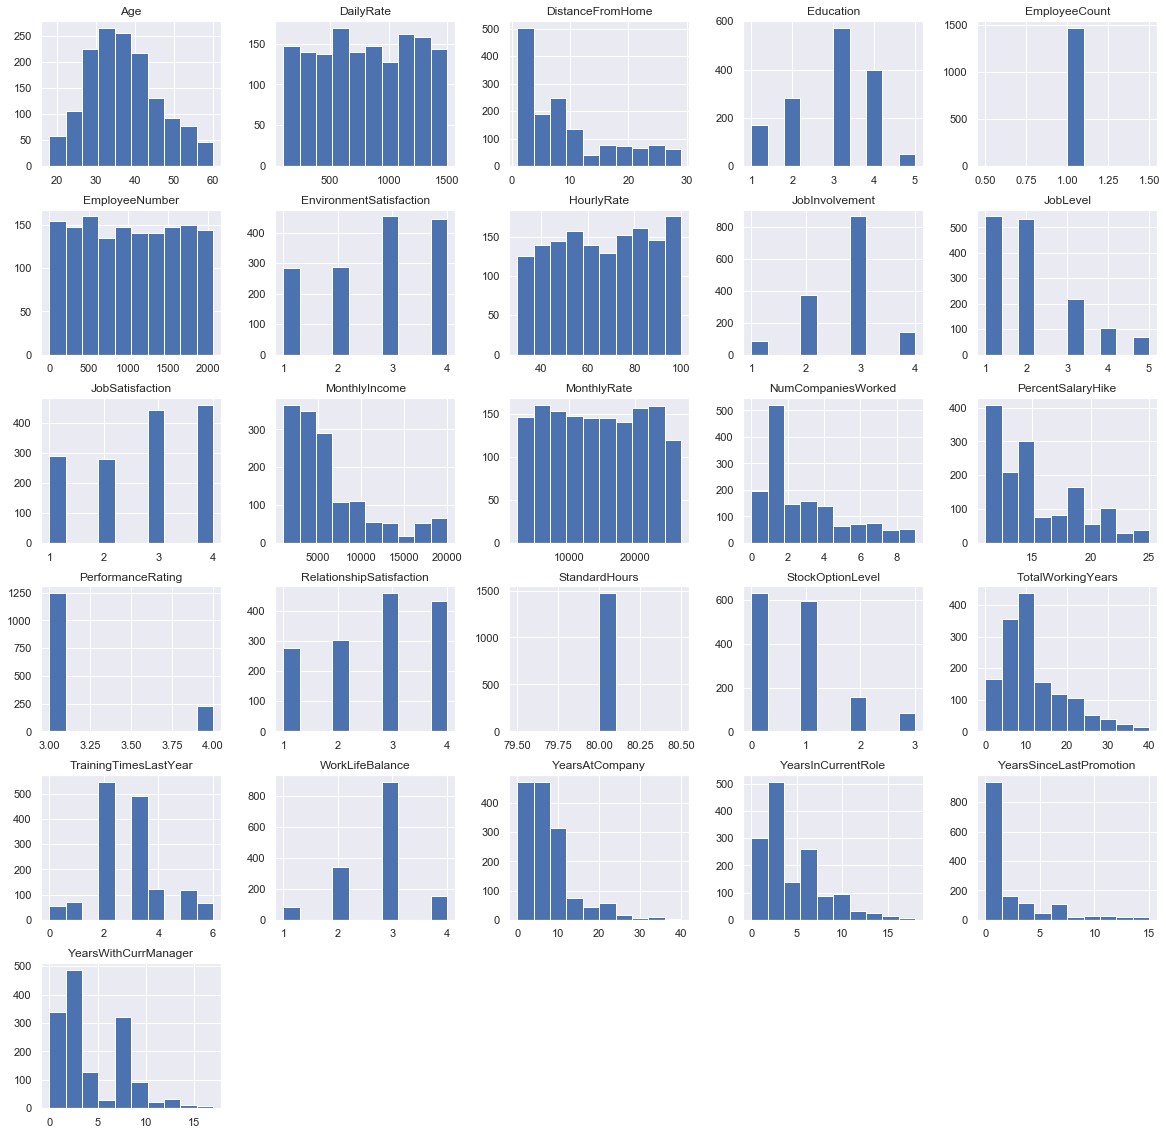

In [184]:
df_HR.hist(figsize=(20,20))

plt.savefig('distribution.png', pad_inches=0.1)
plt.show()

> A few observations can be made based on the information and histograms for numerical features:
 - Many histograms are tail-heavy; indeed several distributions are right-skewed (e.g. MonthlyIncome, DistanceFromHome, YearsAtCompany). Data transformation methods may be required to approach a normal distribution prior to fitting a model to the data.
 - Age distribution is a slightly right-skewed normal distribution with the bulk of the staff between 25 and 45 years old.
 - EmployeeCount and StandardHours are constant values for all employees. They're likely to be redundant features.
 - Employee Number is likely to be a unique identifier for employees given the feature's quasi-uniform distribution.

### Target Variable: Attrition

> The feature 'Attrition' is what this Machine Learning problem is about. We are trying to predict the value of the feature 'Attrition' by using other related features associated with the employee's personal and professional history. 

In [130]:
# Get a count of the number of employee attrition 
# the number of employees that stayed (no) and the number that left (yes)
df_HR['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

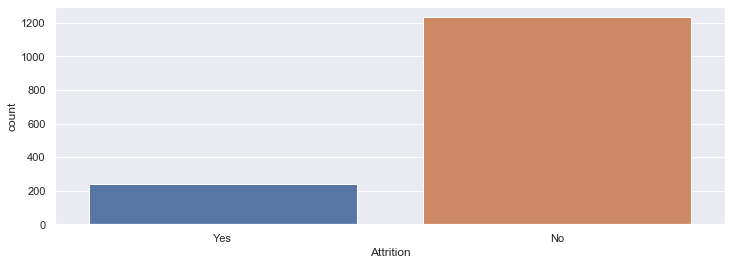

In [185]:
plt.figure()
sns.set(rc={'figure.figsize':(12, 4)})
ax = sns.countplot(x='Attrition', data=df_HR)
plt.savefig('target.png', pad_inches=0.1)

> As shown on the chart above, we see this is an imbalanced class problem.

> Machine learning algorithms typically work best when the number of instances of each classes are roughly equal. We will have to address this target feature imbalance prior to implementing our Machine Learning algorithms.

### Feature distribution by target attribute

#### Age

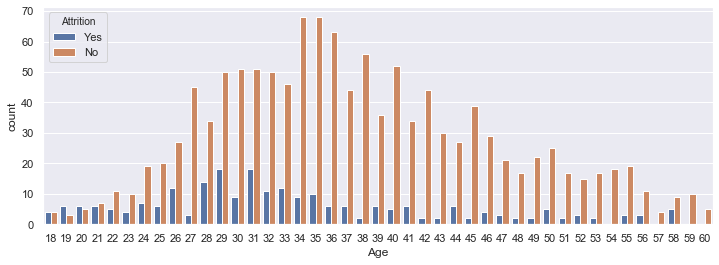

In [132]:
plt.figure()
sns.set(rc={'figure.figsize':(12, 4)})
ax = sns.countplot(x='Age', hue='Attrition', data=df_HR)

> the age with the highest count of employee attrition is age 29 & 31. The age with the highest retention is age 34 & 35.

#### Education

> Several Education Fields are represented in the dataset, namely: Human Resources, Life Sciences, Marketing, Medical, Technical Degree, and a miscellaneous category Other.

In [133]:
# Education Field of employees
df_HR['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

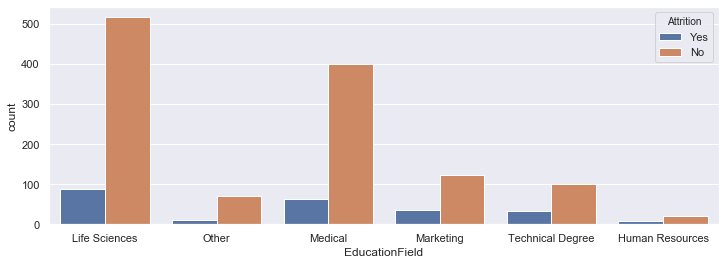

In [74]:
plt.figure()
sns.set(rc={'figure.figsize':(12, 4)})
ax = sns.countplot(x='EducationField', hue='Attrition', data=df_HR)

#### Gender

In [134]:
# Gender of employees
df_HR['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

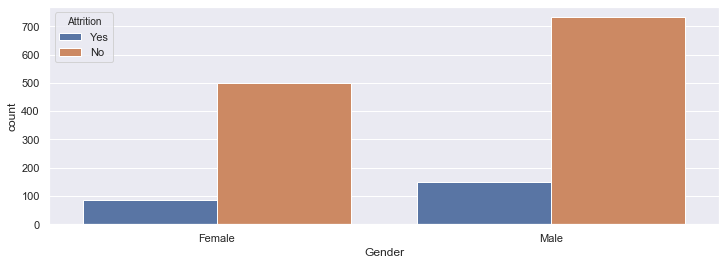

In [135]:
plt.figure()
sns.set(rc={'figure.figsize':(12, 4)})
ax = sns.countplot(x='Gender', hue='Attrition', data=df_HR)

#### Marital Status

> The dataset features three marital status: Married (673 employees), Single (470 employees), Divorced (327 employees). <br>
Single employees show the largest proportion of leavers.

In [136]:
# Marital Status of employees
df_HR['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

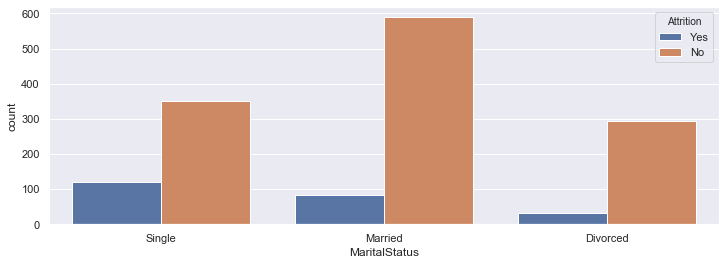

In [137]:
plt.figure()
sns.set(rc={'figure.figsize':(12, 4)})
ax = sns.countplot(x='MaritalStatus', hue='Attrition', data=df_HR)

#### Distance from Home

> Distance from home for employees to get to work varies from 1 to 29 miles.

In [80]:
# Distance from Home
print("Distance from home for employees to get to work is from {} to {} miles.".format(df_HR['DistanceFromHome'].min(),
                                                                                       df_HR['DistanceFromHome'].max()))

Distance from home for employees to get to work is from 1 to 29 miles.


In [81]:
print('Average distance from home for currently active employees: {:.2f} miles and ex-employees: {:.2f} miles'.format(
    df_HR[df_HR['Attrition'] == 'No']['DistanceFromHome'].mean(), df_HR[df_HR['Attrition'] == 'Yes']['DistanceFromHome'].mean()))

Average distance from home for currently active employees: 8.92 miles and ex-employees: 10.63 miles


#### Department

> The data features employee data from three departments: Research & Development, Sales, and Human Resources.

In [138]:
# The organisation consists of several departments
df_HR['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

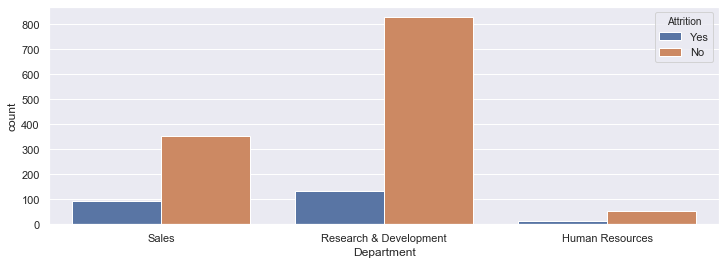

In [139]:
plt.figure()
sns.set(rc={'figure.figsize':(12, 4)})
ax = sns.countplot(x='Department', hue='Attrition', data=df_HR)

#### Role and Work Conditions

In [140]:
# Employees have different business travel commitmnent depending on their roles and level in the organisation
df_HR['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

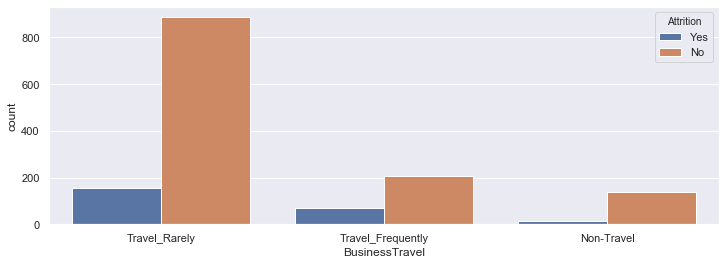

In [142]:
plt.figure()
sns.set(rc={'figure.figsize':(12, 4)})
ax = sns.countplot(x='BusinessTravel', hue='Attrition', data=df_HR)

> Several Job Roles are listed in the dataset: Sales Executive, Research Scientist, Laboratory Technician, Manufacturing Director, Healthcare Representative, Manager, Sales Representative, Research Director, Human Resources.

In [143]:
# Employees in the database have several roles on-file
df_HR['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

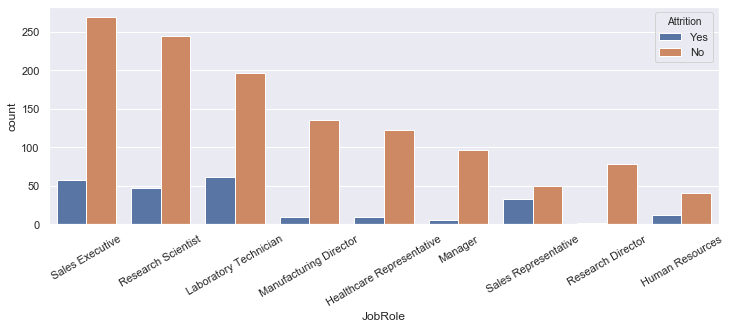

In [144]:
plt.figure()
sns.set(rc={'figure.figsize':(12, 4)})
ax = sns.countplot(x='JobRole', hue='Attrition', data=df_HR)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show()

> Employees have an assigned level within the organisation which varies from 1 (staff) to 5 (managerial/director). Employees with an assigned Job Level of "1" show the largest proportion of Leavers.

In [145]:
df_HR['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

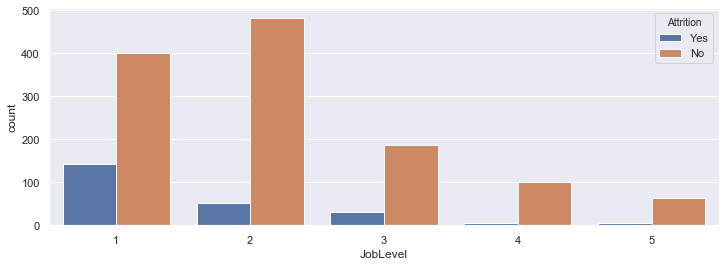

In [147]:
plt.figure()
sns.set(rc={'figure.figsize':(12, 4)})
ax = sns.countplot(x='JobLevel', hue='Attrition', data=df_HR)

#### Years at the Company

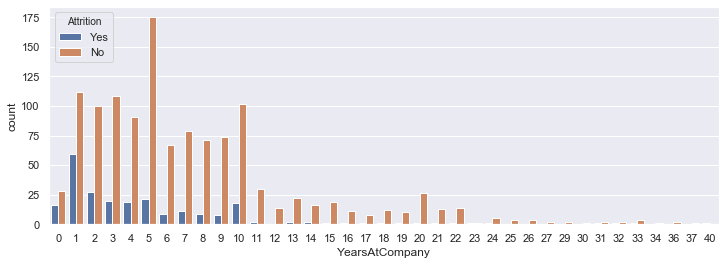

In [150]:
plt.figure()
sns.set(rc={'figure.figsize':(12, 4)})
ax = sns.countplot(x='YearsAtCompany', hue='Attrition', data=df_HR)

In [154]:
print('Average Number of Years at the company for currently active employees: {:.2f} years and ex-employees: {:.2f} years'.format(
    df_HR[df_HR['Attrition'] == 'No']['YearsAtCompany'].mean(), df_HR[df_HR['Attrition'] == 'Yes']['YearsAtCompany'].mean()))

Average Number of Years at the company for currently active employees: 7.37 years and ex-employees: 5.13 years


In [155]:
print("Number of Years at the company varies from {} to {} years.".format(
    df_HR['YearsAtCompany'].min(), df_HR['YearsAtCompany'].max()))

Number of Years at the company varies from 0 to 40 years.


#### Years in the current role

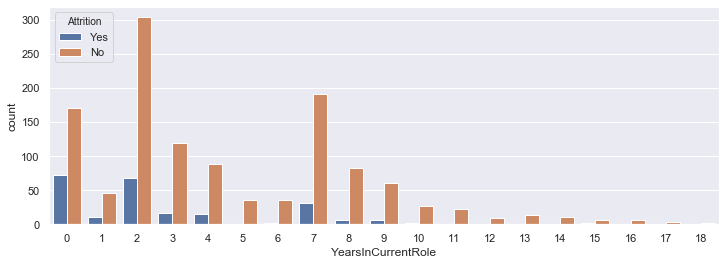

In [151]:
plt.figure()
sns.set(rc={'figure.figsize':(12, 4)})
ax = sns.countplot(x='YearsInCurrentRole', hue='Attrition', data=df_HR)

In [156]:
print("Number of Years in the current role varies from {} to {} years.".format(
    df_HR['YearsInCurrentRole'].min(), df_HR['YearsInCurrentRole'].max()))

Number of Years in the current role varies from 0 to 18 years.


#### Years With Current Manager

In [157]:
print('Average Number of Years wit current manager for currently active employees: {:.2f} years and ex-employees: {:.2f} years'.format(
    df_HR[df_HR['Attrition'] == 'No']['YearsWithCurrManager'].mean(), df_HR[df_HR['Attrition'] == 'Yes']['YearsWithCurrManager'].mean()))

Average Number of Years wit current manager for currently active employees: 4.37 years and ex-employees: 2.85 years


In [158]:
print("Number of Years wit current manager varies from {} to {} years.".format(
    df_HR['YearsWithCurrManager'].min(), df_HR['YearsWithCurrManager'].max()))

Number of Years wit current manager varies from 0 to 17 years.


#### Work-Life Balance Score

> A feature related to "Work-Life Balance" was captured as: 1 'Bad' 2 'Good' 3 'Better' 4 'Best'.

In [159]:
df_HR['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

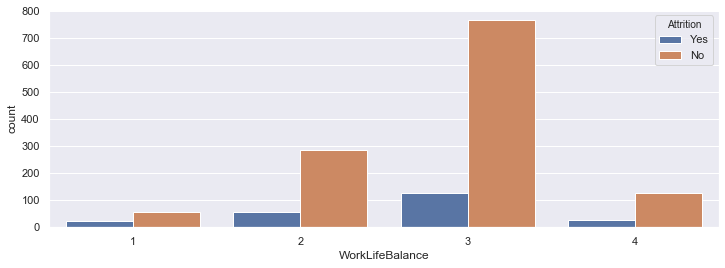

In [165]:
plt.figure()
sns.set(rc={'figure.figsize':(12, 4)})
ax = sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df_HR)

> All employees have a standard 80-hour work commitment

In [105]:
df_HR['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

> Some employees have overtime commitments. The data show that there is larger portion of employees with OT that have left the company.

In [106]:
df_HR['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

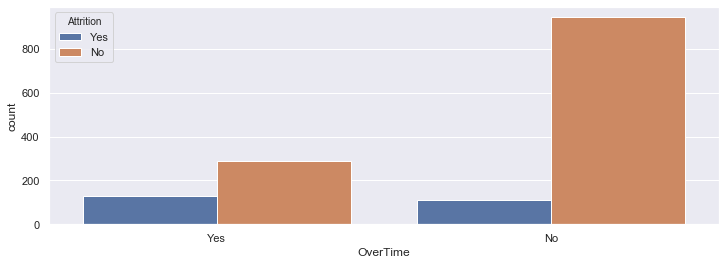

In [107]:
plt.figure()
sns.set(rc={'figure.figsize':(12, 4)})
ax = sns.countplot(x='OverTime', hue='Attrition', data=df_HR)

#### Pay/Salary Employee Information

In [166]:
print("Employee Hourly Rate varies from ${} to ${}.".format(
    df_HR['HourlyRate'].min(), df_HR['HourlyRate'].max()))

Employee Hourly Rate varies from $30 to $100.


In [167]:
print("Employee Daily Rate varies from ${} to ${}.".format(
    df_HR['DailyRate'].min(), df_HR['DailyRate'].max()))

Employee Daily Rate varies from $102 to $1499.


In [168]:
print("Employee Monthly Rate varies from ${} to ${}.".format(
    df_HR['MonthlyRate'].min(), df_HR['MonthlyRate'].max()))

Employee Monthly Rate varies from $2094 to $26999.


In [169]:
print("Employee Monthly Income varies from ${} to ${}.".format(
    df_HR['MonthlyIncome'].min(), df_HR['MonthlyIncome'].max()))

Employee Monthly Income varies from $1009 to $19999.


In [170]:
print("Percentage Salary Hikes varies from {}% to {}%.".format(
    df_HR['PercentSalaryHike'].min(), df_HR['PercentSalaryHike'].max()))

Percentage Salary Hikes varies from 11% to 25%.


#### Employee Satisfaction and Performance Information

> Environment Satisfaction was captured as: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'. <br> 

In [171]:
df_HR['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

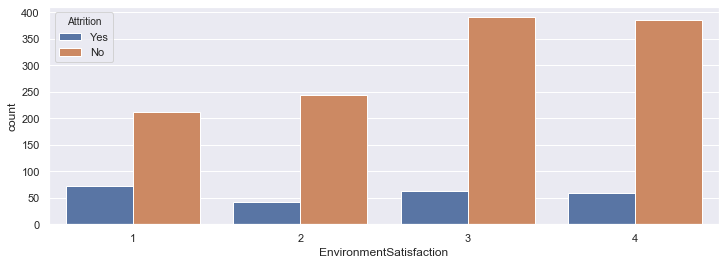

In [172]:
plt.figure()
sns.set(rc={'figure.figsize':(12, 4)})
ax = sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=df_HR)

> Job Satisfaction was captured as: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'. <br> 

In [173]:
# Job Satisfaction was captured as: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
df_HR['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

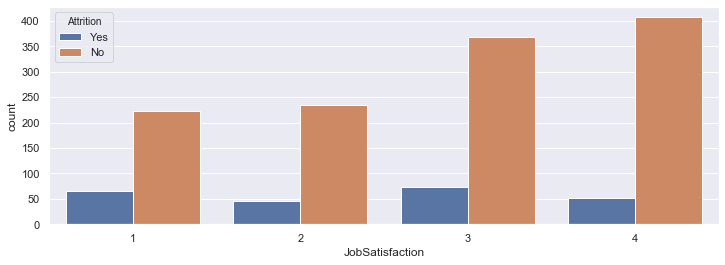

In [174]:
plt.figure()
sns.set(rc={'figure.figsize':(12, 4)})
ax = sns.countplot(x='JobSatisfaction', hue='Attrition', data=df_HR)

> Relationship Satisfaction was captured as: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'.

In [175]:
df_HR['RelationshipSatisfaction'].value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

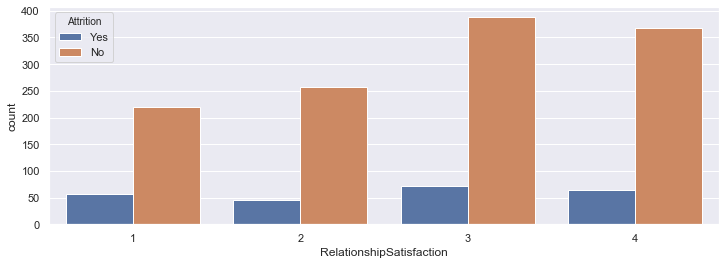

In [176]:
plt.figure()
sns.set(rc={'figure.figsize':(12, 4)})
ax = sns.countplot(x='RelationshipSatisfaction', hue='Attrition', data=df_HR)

> Employee Performance Rating was captured as: 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

In [177]:
df_HR['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

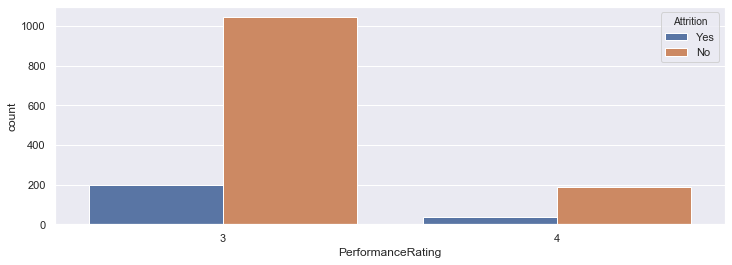

In [178]:
plt.figure()
sns.set(rc={'figure.figsize':(12, 4)})
ax = sns.countplot(x='PerformanceRating', hue='Attrition', data=df_HR)

### Correlation

> Let's take a look at some of most significant correlations. It is worth remembering that correlation coefficients only measure linear correlations.

In [179]:
#Get the correlation of the columns
df_HR.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


> Let's plot a heatmap to visualize the correlation between Attrition and these factors.

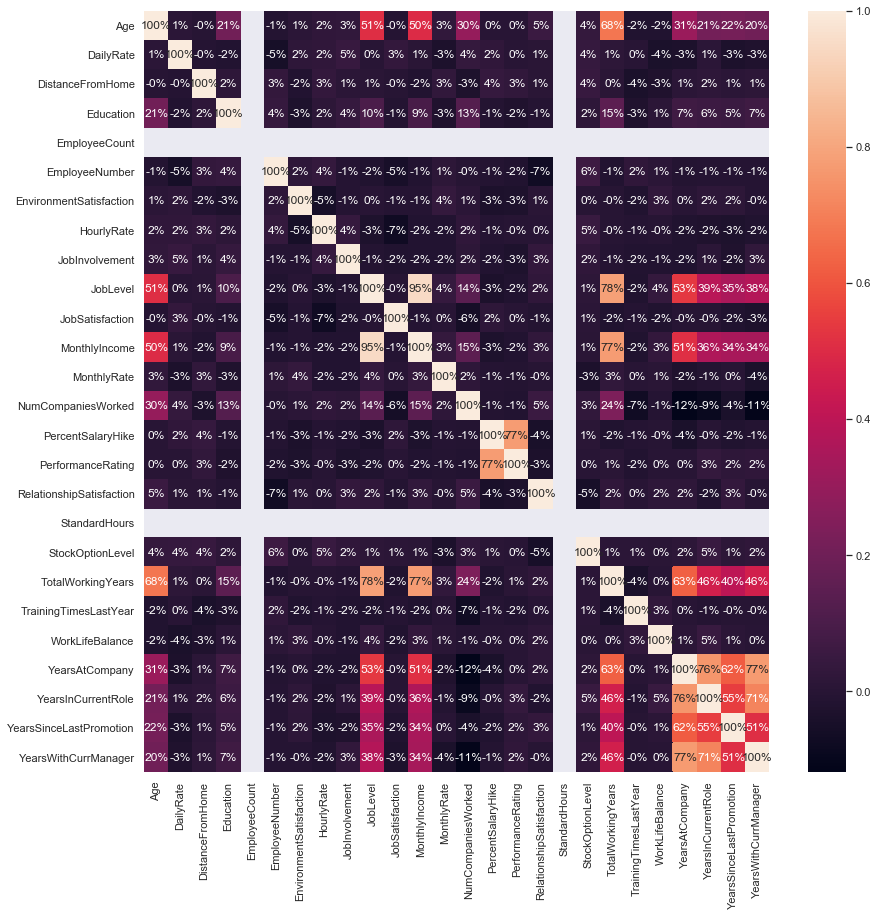

In [181]:
#Visualize the correlation
plt.figure(figsize=(14,14))  #14in by 14in
sns.heatmap(df_HR.corr(), annot=True, fmt='.0%')

# fix for cropped axis
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()
plt.show()

In [182]:
#Print all of the object data types and their unique values
for column in df_HR.columns:
    if df_HR[column].dtype == object:
        print(str(column) + ' : ' + str(df_HR[column].unique()))
        print(df_HR[column].value_counts())
        print("_________________________________________________________________")

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
_________________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
_________________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
_________________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
_________________________________________________________________
Gender 